Выберите какое-нибудь семантическое поле, например, 
"транспорт", "глаголы говорения" и т.п. и в качестве первого узла или 
нескольких первых узлов возьмите любые слова из этого поля. 
Слова должны быть одной части речи!
Найдите соседей узла (узлов), заданного вами в качестве отправной точки, 
отфильтруйте их по значению косинусной близости и добавьте в граф.
Найдите соседей узлов, добавленных на предыдущем этапе, отфильтруйте их 
по значению косинусной близости и добавьте в граф.
Вычислите самые центральные узлы графа по degree centrality, 
betweenness centrality, closeness centrality и eigencentrality.
Вычислите плотность графа, его диаметр, радиус, коэффициент кластеризации 
и коэффициент ассортативности.
Визуализируйте граф. Размер и цвет узлов должен соответствовать 
каким-то параметрам — например, размер может показывать центральность 
по любой из метрик, а цвет — разбиение на сообщества. 
Выбранные параметры должны быть указаны либо в комментариях к коду, 
либо в отдельной текстовой ячейке с описанием графа. Узлы должны быть подписаны.
1	Программа запускается и оформлена по PEP8.
2	Строится граф для какого либо семантического поля. Находятся соседи первого и второго порядка для изначально заданного узла (узлов).
1	В граф добавляются только узлы, имеющие косинусную близость ≥0.5 к любому из уже имеющихся
1	Реализована фильтрация по частям речи: узлами являются только существительные, только глаголы и т.п.
1	Рассчитана центральность узлов графа по метрикам, указанным в п.4.
1	Рассчитано значение метрик, указанных в п.5.
1	Граф разбит на сообщества, есть краткая интерпретация.
1	Граф визуализирован
1	Внешний вид графа задан в соответствии с п.7

In [7]:
import sys
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import urllib.request
url = "http://rusvectores.org/static/models/rusvectores2/" \
    "ruscorpora_mystem_cbow_300_2_2015.bin.gz"
m = "ruscorpora_mystem_cbow_300_2_2015.bin.gz"

import os
if m not in os.listdir():
    urllib.request.urlretrieve(url, m)
if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)
    
model.init_sims(replace=True)

neibs = []
words = ['цвет_S']
for word in words:
    if word in model:
        for i in model.most_similar(positive=[word], topn=50):
            if i[0].endswith('_S') and i[1] >= 0.5:
                a = (word, i[0], i[1])
                neibs.append(a)
                for k in model.most_similar(positive=[i[0]], topn=50):
                    if k[0].endswith('_S') and k[1] >= 0.5:
                        b = (i[0], k[0], k[1])
                        neibs.append(b)
    else:
        print(word + ' is not present in the model')
for item in neibs:
    print(item)

2019-06-06 23:23:29,641 : INFO : loading projection weights from ruscorpora_mystem_cbow_300_2_2015.bin.gz
/Users/new.aloha/anaconda3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-06-06 23:23:44,296 : INFO : loaded (281776, 300) matrix from ruscorpora_mystem_cbow_300_2_2015.bin.gz
2019-06-06 23:23:44,347 : INFO : precomputing L2-norms of word weight vectors


('цвет_S', 'окраска_S', 0.6767391562461853)
('окраска_S', 'цвет_S', 0.6767392158508301)
('окраска_S', 'оттенок_S', 0.6581172347068787)
('окраска_S', 'окрашивание_S', 0.5267184972763062)
('окраска_S', 'колорит_S', 0.5069297552108765)
('цвет_S', 'оттенок_S', 0.6260433197021484)
('оттенок_S', 'окраска_S', 0.6581172347068787)
('оттенок_S', 'цвет_S', 0.6260433793067932)
('оттенок_S', 'полутон_S', 0.511695146560669)
('цвет_S', 'крапинка_S', 0.6170916557312012)
('крапинка_S', 'пятнышко_S', 0.637381911277771)
('крапинка_S', 'крапина_S', 0.6218763589859009)
('крапинка_S', 'цвет_S', 0.617091715335846)
('крапинка_S', 'прожилка_S', 0.6052037477493286)
('крапинка_S', 'пятно_S', 0.5993480682373047)
('крапинка_S', 'каемка_S', 0.5970361232757568)
('крапинка_S', 'полоска_S', 0.5552693605422974)
('крапинка_S', 'кайма_S', 0.5459269285202026)
('крапинка_S', 'разводы_S', 0.5421571135520935)
('крапинка_S', 'горошинка_S', 0.5395733118057251)
('крапинка_S', 'точечка_S', 0.5378897190093994)
('крапинка_S', 'под

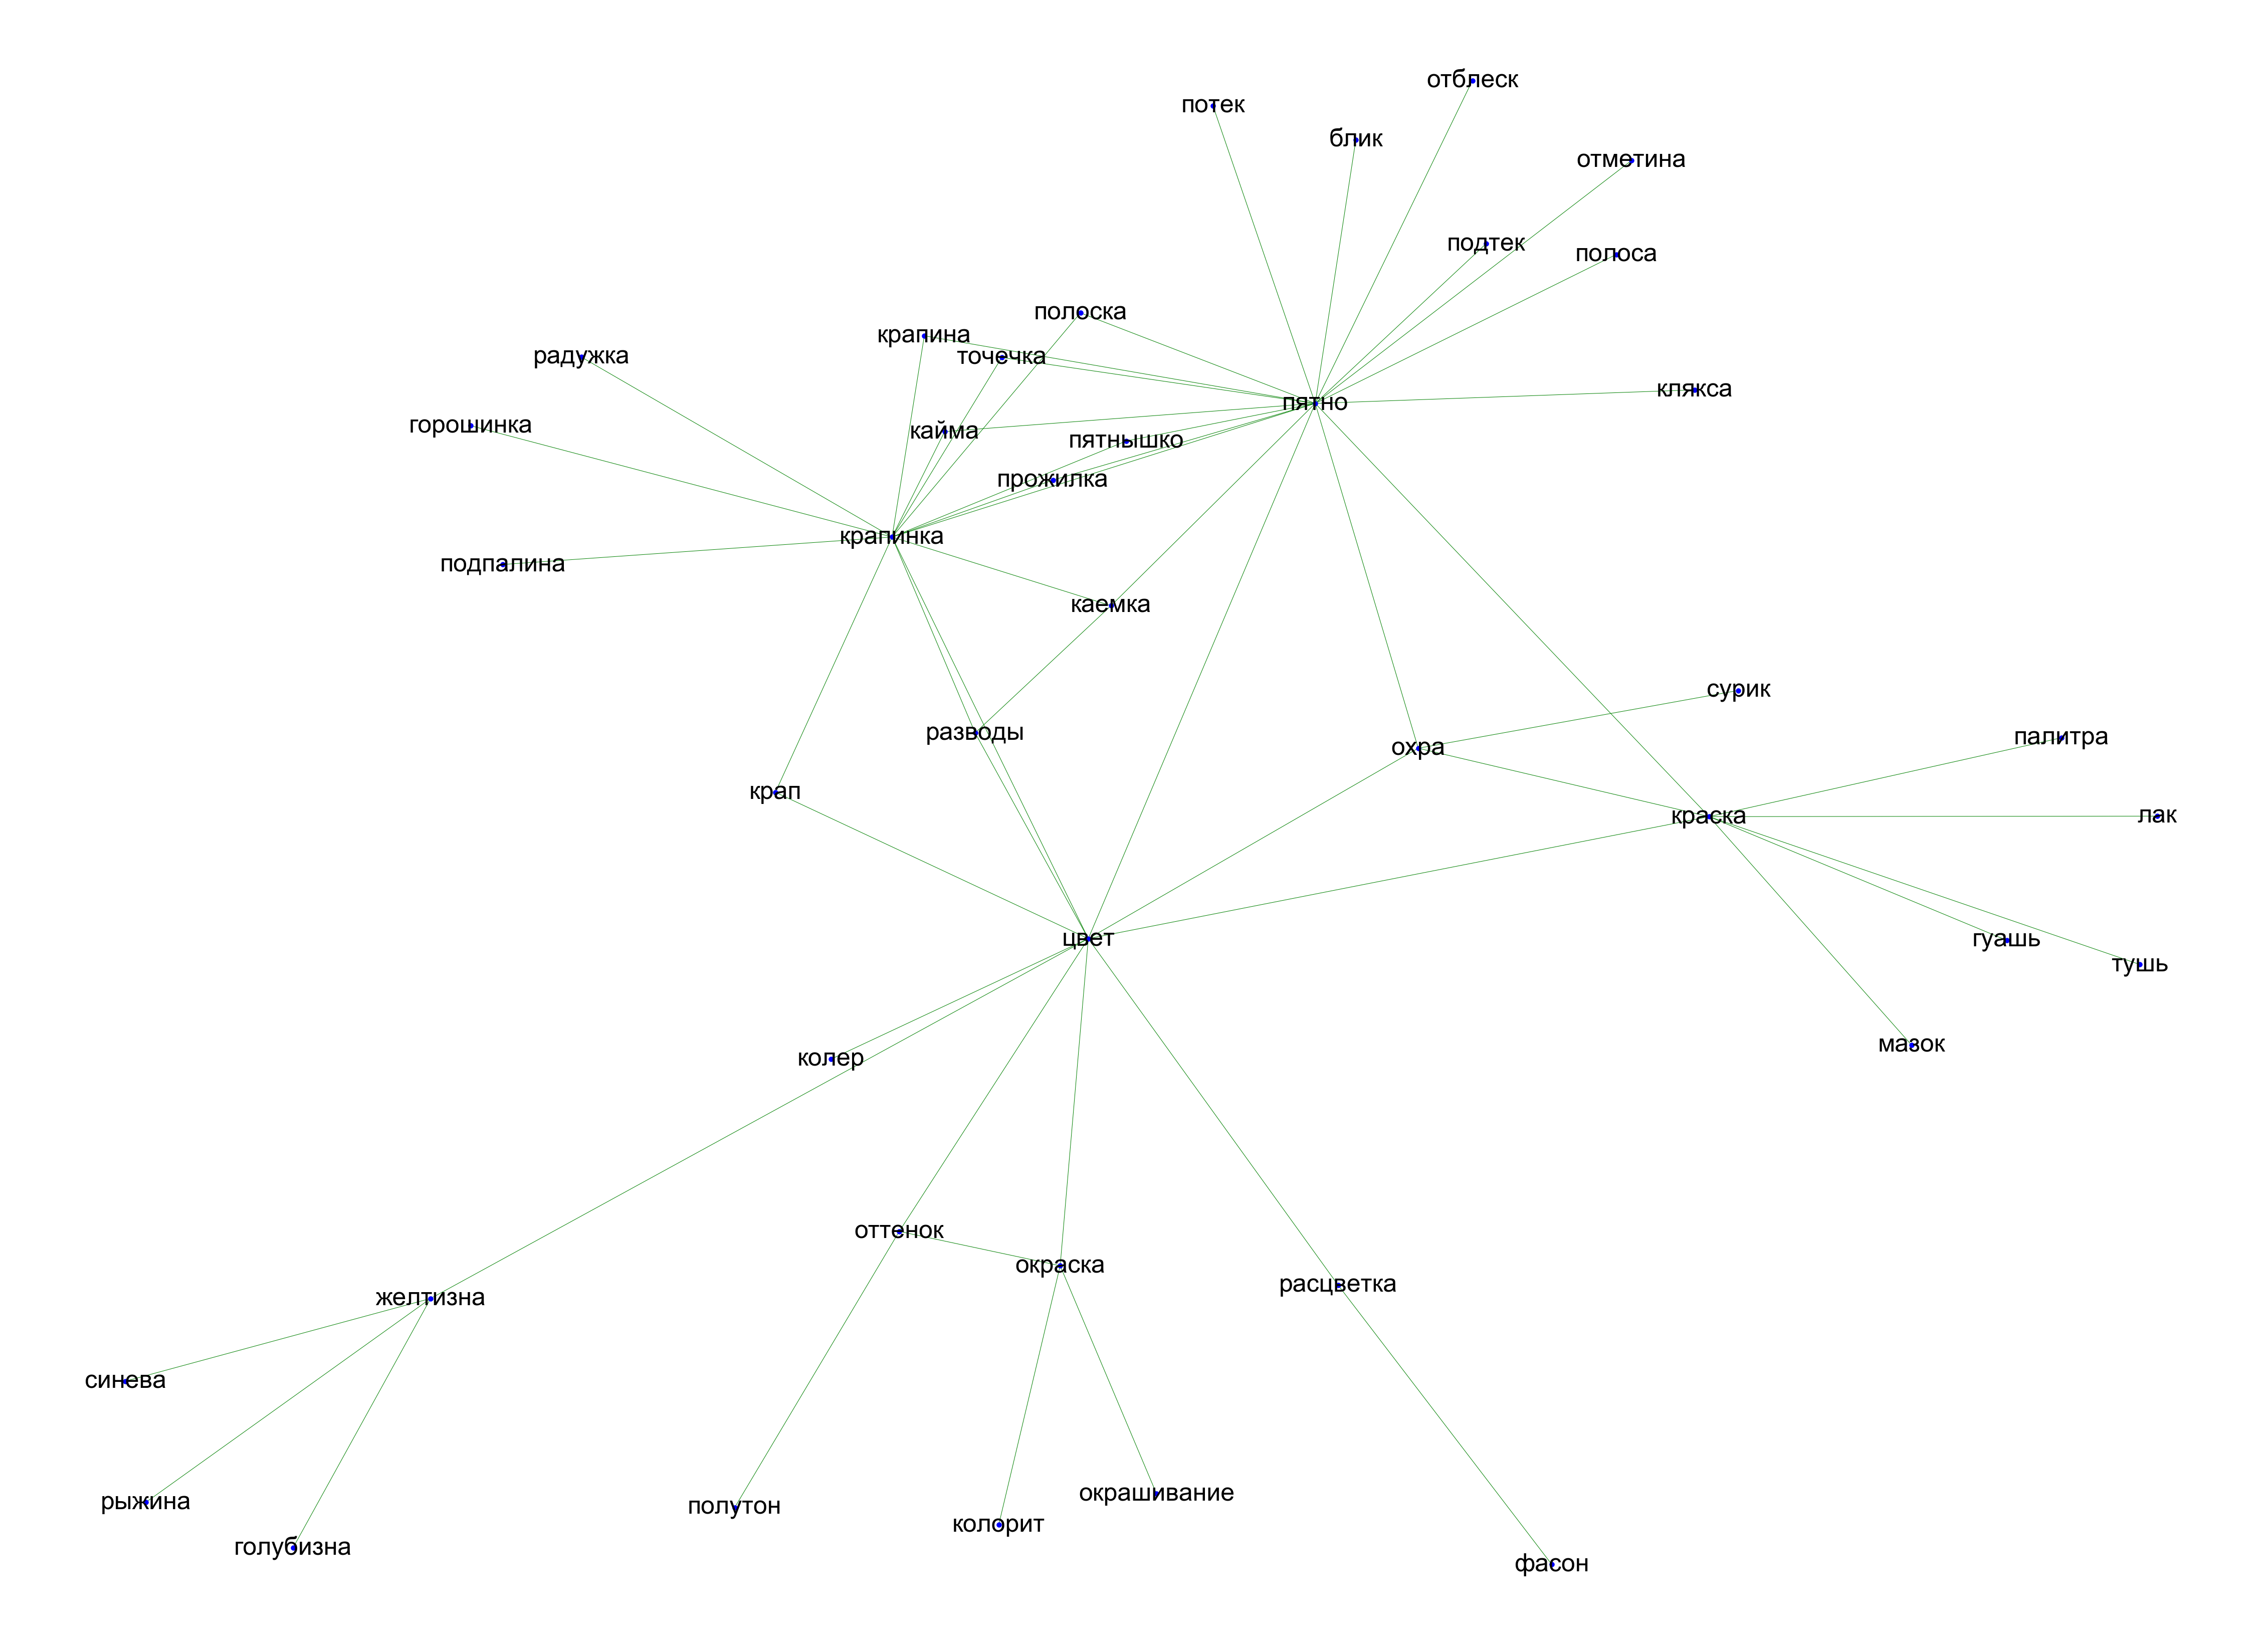

degree centrality:  пятно
betweenness centrality:  ('цвет', 'пятно')
closeness centrality:  цвет
eigencentrality:  пятно
радиус графа:  2
диаметр графа:  4
коэффициент ассортативности:  -0.49299852103590425
плотность графа:  0.06504065040650407
коэффициент кластеризации: 0.23239341579677714


[['блик',
  'горошинка',
  'каемка',
  'кайма',
  'клякса',
  'крап',
  'крапина',
  'крапинка',
  'отблеск',
  'отметина',
  'подпалина',
  'подтек',
  'полоса',
  'полоска',
  'потек',
  'прожилка',
  'пятно',
  'пятнышко',
  'радужка',
  'разводы',
  'точечка'],
 ['голубизна',
  'желтизна',
  'колер',
  'колорит',
  'окраска',
  'окрашивание',
  'оттенок',
  'полутон',
  'расцветка',
  'рыжина',
  'синева',
  'фасон',
  'цвет'],
 ['гуашь', 'краска', 'лак', 'мазок', 'охра', 'палитра', 'сурик', 'тушь']]

In [49]:
import networkx as nx

words = []
for a in neibs:
    for item in a:
        if isinstance(item, str):
            if item not in words:
                words.append(item)

G = nx.Graph()
for key in words:
    G.add_node(key[:-2])
for a in neibs:
    n1 = a[0][:-2]
    n2 = a[1][:-2]
    wg = a[2] * 1000
    G.add_edge(n1, n2, weight=wg)
    
nx.write_gexf(G, 'graph_file.gexf')

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') 

pos=nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=100)
nx.draw_networkx_edges(G, pos, edge_color='green')
nx.draw_networkx_labels(G, pos, font_size=50, font_family='Arial')
plt.rcParams["figure.figsize"] = (80, 60)
plt.axis('off')
plt.show()

#сетевой анализ
#degree centrality
deg = nx.degree_centrality(G)
node_1 = sorted(deg, key=deg.get, reverse=True)[0]
print('degree centrality: ', node_1)

#betweenness centrality
bet = nx.edge_betweenness_centrality(G)
node_2 = sorted(bet, key=bet.get, reverse=True)[0]
print('betweenness centrality: ', node_2)

#closeness centrality
clos = nx.closeness_centrality(G)
node_3 = sorted(clos, key=clos.get, reverse=True)[0]
print('closeness centrality: ', node_3)

#eigencentrality
eig = nx.eigenvector_centrality(G)
node_4 = sorted(eig, key=eig.get, reverse=True)[0]
print('eigencentrality: ', node_4)

#радиус графа
print('радиус графа: ', nx.radius(G))

#диаметр графа
print('диаметр графа: ', nx.diameter(G))

#коэффициент ассортативности
print('коэффициент ассортативности: ', nx.degree_pearson_correlation_coefficient(G))

#плотность графа
print('плотность графа: ', nx.density(G))

#коэффициент кластеризации
print('коэффициент кластеризации:', nx.average_clustering(G))

from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

Интепретация: 
- форма того, что может иметь цвет, если говорить о загрязнении в некотором роде;
- цветовое наполнение;
- то, что оставляет след.